In [38]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
import numpy as np
from metadata_helpers import save_score_automl
import joblib
from autosklearn.metrics import root_mean_squared_error
import pandas as pd
import sklearn.model_selection
from sklearn.metrics import mean_squared_error
from ingestion import make_train_test
import autosklearn.regression

# This notebook uses an AutoML package known as auto-sklearn. It generates an ensemble
# of LinearSVR and AdaBoost that outperforms our best manually-obtained model.


if __name__ == "__main__":
    automl = {}
    filename_automl = "saved_model_automl.pkl"
    if os.path.exists(filename_automl):
        automl = joblib.load(filename=filename_automl)
    else:
        X_train, X_test, y_train, y_test = make_train_test()

        categoricals = X_train.select_dtypes(object).columns.tolist()
        X_train[categoricals] = X_train.select_dtypes(
            object).astype('category')
        scorer = root_mean_squared_error

        automl = autosklearn.regression.AutoSklearnRegressor(metric=scorer)
        automl.fit(X_train, np.float64(y_train.to_numpy()))

        joblib.dump(automl, filename=filename_automl, compress=6)


In [39]:
y_hat = automl.predict(X_test)
rmse = mean_squared_error(y_test, y_hat, squared=False)
rmse


19776.32208362576

In [40]:
save_score_automl(automl, rmse)


In [41]:
for k, v in automl.show_models().items():
    print(automl.show_models()[k]['sklearn_regressor'])


LinearSVR(C=20.84974230759741, dual=False, epsilon=0.0034698299588662588,
          loss='squared_epsilon_insensitive', random_state=1,
          tol=0.0011798663561849055)
LinearSVR(C=294.9348468476327, dual=False, epsilon=0.002611000794454022,
          loss='squared_epsilon_insensitive', random_state=1,
          tol=0.0006886423122301761)
LinearSVR(C=21.73833973507962, dual=False, epsilon=0.001813924615017535,
          loss='squared_epsilon_insensitive', random_state=1,
          tol=0.004675412644845503)
LinearSVR(C=1012.2287615869405, dual=False, epsilon=0.002016014697053365,
          loss='squared_epsilon_insensitive', random_state=1,
          tol=0.006665680041661247)
LinearSVR(C=672.1259212154973, dual=False, epsilon=0.1311428521318685,
          loss='squared_epsilon_insensitive', random_state=1,
          tol=0.0008383683887414546)
LinearSVR(C=874.8240412621645, dual=False, epsilon=0.002120628860258302,
          loss='squared_epsilon_insensitive', random_state=1,
       

Text(0, 0.5, 'y_true')

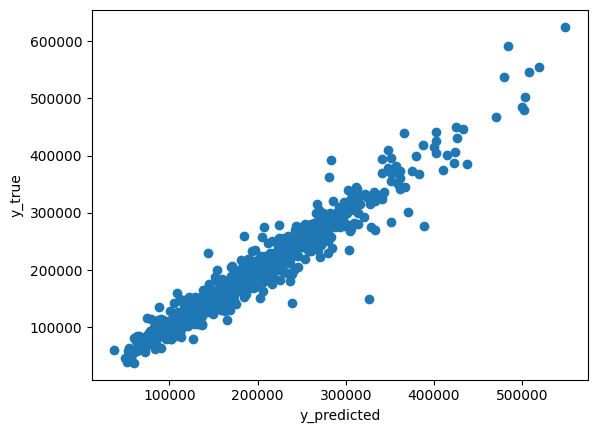

In [43]:
import matplotlib.pyplot as plt
plt.scatter(x=y_hat, y=y_test)
pd.Series(np.abs(y_hat-y_test)).describe()
plt.xlabel("y_predicted")
plt.ylabel("y_true")
